In [19]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [20]:
data = pd.read_csv("Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


### Map Data

In [21]:
data_mapped = data.copy()
data_mapped["Language"] = data_mapped["Language"].map({"English":0,"French":1,"German":2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [22]:
x = data_mapped.iloc[:,1:4]

In [23]:
kmeans = KMeans(2)

In [24]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 1, 1, 1, 1, 0])

In [26]:
data_with_clusters = data.copy()
data_with_clusters["Cluster"]=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,1
1,Canada,62.40,-96.80,English,1
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,0


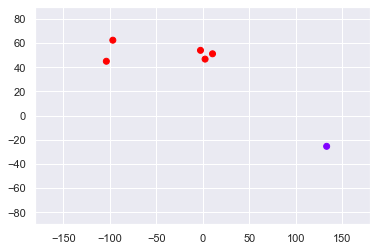

In [27]:
plt.scatter(data_with_clusters["Longitude"],data_with_clusters["Latitude"],c=data_with_clusters["Cluster"],cmap="rainbow")
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Selecting the number of clusters

### WCSS

In [28]:
kmeans.inertia_

13208.95812

In [29]:
wcss=[]

for i in range(1,7):
    kmeans= KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

In [30]:
wcss

[42605.41356666667,
 13208.95812,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

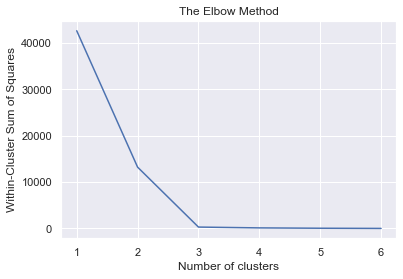

In [31]:
number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster Sum of Squares")
plt.show()